In [1]:
import pandas as pd
import numpy as np
import datetime
from sklearn import preprocessing
from sklearn.utils import shuffle
from keras import layers
from keras.models import Sequential
from keras import optimizers
from keras.utils import plot_model
import matplotlib.pyplot as plt
import sys
sys.path.append(r'D:\jupyter files\waiting_time_project\my_tools')
import tools_for_os.for_df as ml_df
import tools_for_os.for_file as ml_fl
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [2]:
data_path = 'D:\\jupyter files\\data_waiting_time_project\\preprocess_data\\'
pat_duration_LSTM_data_path = data_path + 'patient_duration_LSTM_data\\'

ml_fl.create_folder(pat_duration_LSTM_data_path)

D:\jupyter files\data_waiting_time_project\preprocess_data\patient_duration_LSTM_data\ already existed!


In [3]:
def combine_mul_row_appt(data_part1):
    new_appt = pd.DataFrame({})

    print('Start cateorical features')
    print('\nStart PatientSerNum')
    new_appt['PatientSerNum'] = data_part1.groupby('AppointmentSerNum').PatientSerNum.apply(set)
    new_appt['PatientSerNum'] = new_appt['PatientSerNum'].apply(lambda x: ml_df.get_list(x))

    print('Start Sex')
    new_appt['Sex'] = data_part1.groupby('AppointmentSerNum').Sex.apply(set)
    new_appt['Sex'] = new_appt['Sex'].apply(lambda x: ml_df.get_list(x))

    print('Start DoctorSerNum')
    new_appt['DoctorSerNum'] = data_part1.groupby('AppointmentSerNum').DoctorSerNum.apply(set)
    new_appt['DoctorSerNum'] = new_appt['DoctorSerNum'].apply(lambda x: ml_df.get_list(x))

    print('Start date')
    new_appt['date'] = data_part1.groupby('AppointmentSerNum').date.apply(set)
    new_appt['date'] = new_appt['date'].apply(lambda x: ml_df.get_list(x))

    print('Start ScheduledStartTime')
    new_appt['ScheduledStartTime'] = data_part1.groupby('AppointmentSerNum').ScheduledStartTime.apply(set)
    new_appt['ScheduledStartTime'] = new_appt['ScheduledStartTime'].apply(lambda x: ml_df.get_list(x))

    print('Start ScheduledEndTime')
    new_appt['ScheduledEndTime'] = data_part1.groupby('AppointmentSerNum').ScheduledEndTime.apply(set)
    new_appt['ScheduledEndTime'] = new_appt['ScheduledEndTime'].apply(lambda x: ml_df.get_list(x))

    print('Start ActualStartDate')
    new_appt['ActualStartDate'] = data_part1.groupby('AppointmentSerNum').ActualStartDate.apply(set)
    new_appt['ActualStartDate'] = new_appt['ActualStartDate'].apply(lambda x: ml_df.get_list(x))

    print('Start ActualEndDate')
    new_appt['ActualEndDate'] = data_part1.groupby('AppointmentSerNum').ActualEndDate.apply(set)
    new_appt['ActualEndDate'] = new_appt['ActualEndDate'].apply(lambda x: ml_df.get_list(x))

    print('Start dxt_AliasName')
    new_appt['dxt_AliasName'] = data_part1.groupby('AppointmentSerNum').dxt_AliasName.apply(set)
    new_appt['dxt_AliasName'] = new_appt['dxt_AliasName'].apply(lambda x: ml_df.get_list(x))

    print('Start AliasSerNum')
    new_appt['AliasSerNum'] = data_part1.groupby('AppointmentSerNum').AliasSerNum.apply(set)
    new_appt['AliasSerNum'] = new_appt['AliasSerNum'].apply(lambda x: ml_df.get_list(x))

    print('Start CourseSerNum')
    new_appt['CourseSerNum'] = data_part1.groupby('AppointmentSerNum').CourseSerNum.apply(set)
    new_appt['CourseSerNum'] = new_appt['CourseSerNum'].apply(lambda x: ml_df.get_list(x))

    print('Start PlanSerNum')
    new_appt['PlanSerNum'] = data_part1.groupby('AppointmentSerNum').PlanSerNum.apply(set)
    new_appt['PlanSerNum'] = new_appt['PlanSerNum'].apply(lambda x: ml_df.get_list(x))

    print('Start TreatmentOrientation')
    new_appt['TreatmentOrientation'] = data_part1.groupby('AppointmentSerNum').TreatmentOrientation.apply(set)
    new_appt['TreatmentOrientation'] = new_appt['TreatmentOrientation'].apply(lambda x: ml_df.get_list(x))

    print('Start month')
    new_appt['month'] = data_part1.groupby('AppointmentSerNum').month.apply(set)
    new_appt['month'] = new_appt['month'].apply(lambda x: ml_df.get_list(x))

    print('Start week')
    new_appt['week'] = data_part1.groupby('AppointmentSerNum').week.apply(set)
    new_appt['week'] = new_appt['week'].apply(lambda x: ml_df.get_list(x))

    print('Start hour')
    new_appt['hour'] = data_part1.groupby('AppointmentSerNum').hour.apply(set)
    new_appt['hour'] = new_appt['hour'].apply(lambda x: ml_df.get_list(x))

    print('Start AppointmentSerNum')
    new_appt['AppointmentSerNum'] = new_appt.index.tolist()


    print('Start numberical features')
    print('\nStart age')
    new_appt['age'] = data_part1.groupby('AppointmentSerNum').age.mean()

    print('Start Scheduled_duration')
    new_appt['Scheduled_duration'] = data_part1.groupby('AppointmentSerNum').Scheduled_duration.mean()

    print('Start Actual_duration')
    new_appt['Actual_duration'] = data_part1.groupby('AppointmentSerNum').Actual_duration.mean()
    
    new_appt.reset_index(drop = True, inplace = True)
    
    return new_appt

In [4]:
def combine_mul_row_treat(data_part2):
    new_treat = pd.DataFrame({})

    print('Start categorical features')
    print('\nStart FractionNumber')
    new_treat['FractionNumber'] = data_part2.groupby(['PatientSerNum', 'date']).FractionNumber.apply(set)
    new_treat['FractionNumber'] = new_treat['FractionNumber'].apply(lambda x: ml_df.get_list(x))

    print('Start UserName')
    new_treat['UserName'] = data_part2.groupby(['PatientSerNum', 'date']).UserName.apply(set)
    new_treat['UserName'] = new_treat['UserName'].apply(lambda x: ml_df.get_list(x))

    print('Start RadiationSerNum')
    new_treat['RadiationSerNum'] = data_part2.groupby(['PatientSerNum', 'date']).RadiationSerNum.apply(set)
    new_treat['RadiationSerNum'] = new_treat['RadiationSerNum'].apply(lambda x: ml_df.get_list(x))

    print('Start RadiationId')
    new_treat['RadiationId'] = data_part2.groupby(['PatientSerNum', 'date']).RadiationId.apply(set)
    new_treat['RadiationId'] = new_treat['RadiationId'].apply(lambda x: ml_df.get_list(x))

    print('Start ResourceSerNum')
    new_treat['ResourceSerNum'] = data_part2.groupby(['PatientSerNum', 'date']).ResourceSerNum.apply(set)
    new_treat['ResourceSerNum'] = new_treat['ResourceSerNum'].apply(lambda x: ml_df.get_list(x))

    print('Start CourseId')
    new_treat['CourseId'] = data_part2.groupby(['PatientSerNum', 'date']).CourseId.apply(set)
    new_treat['CourseId'] = new_treat['CourseId'].apply(lambda x: ml_df.get_list(x))

    print('Start PatientSerNum')
    new_treat['PatientSerNum'] = new_treat.index.get_level_values(level = 0).tolist()

    print('Start date')
    new_treat['date'] = new_treat.index.get_level_values(level = 1).tolist()
    
    
    print('Start numberical features')
    print('\nStart ImagesTaken_total')
    new_treat['ImagesTaken_total'] = data_part2.groupby(['PatientSerNum', 'date']).ImagesTaken.sum()

    print('Start MU_total')
    new_treat['MU_total'] = data_part2.groupby(['PatientSerNum', 'date']).MU.sum()

    print('Start MUCoeff_total')
    new_treat['MUCoeff_total'] = data_part2.groupby(['PatientSerNum', 'date']).MUCoeff.sum()

    print('Start TreatmentTime_total')
    new_treat['TreatmentTime_total'] = data_part2.groupby(['PatientSerNum', 'date']).TreatmentTime.sum()
    
    new_treat.reset_index(drop = True, inplace = True)
    
    return new_treat

In [5]:
# 数字也能够正常处理，比如出现0，同样会正常处理，并不会认为0 是没有值
def one_hot_enc(feature, data):
    # one hot encoder
    one_hot_encoder = preprocessing.OneHotEncoder(handle_unknown = 'ignore', sparse = False)
    one_hot_encoder.fit(data[feature].values.reshape(-1, 1))
    return one_hot_encoder

=====================================================================================
# 数据预处理

In [6]:
feature_num = ['Scheduled_duration', 'Actual_duration',
               'age', 'TreatmentTime_total', 'ImagesTaken_total',
               'MU_total', 'MUCoeff_total', 'Interval_scheduled']

# RadiationId
feature_cate = ['dxt_AliasName', 'Sex', 'AliasSerNum',
                'month', 'week', 'hour', 'DoctorSerNum', 
                'TreatmentOrientation', 'FractionNumber',
                'UserName', 'CourseId', 'ResourceSerNum']

# 加载数据
print('='*40)
print('Load data_part')
data_part1 = pd.read_csv(data_path + 'data_part1.csv', index_col = 0)
data_part2 = pd.read_csv(data_path + 'data_part2.csv', index_col = 0)


# 缺失值填补
print('='*40)
print('Fill nan data')
data_part1 = ml_df.fill_nan(data_part1, feature_num, 'number')
data_part1 = ml_df.fill_nan(data_part1, feature_cate, 'cate')

data_part2 = ml_df.fill_nan(data_part2, feature_num, 'number')
data_part2 = ml_df.fill_nan(data_part2, feature_cate, 'cate')


# 进行one hot 编码
print('='*40)
print('One Hot Encoding')
label_encoder_dxt_AliasName = one_hot_enc('dxt_AliasName', data_part1)
label_encoder_Sex = one_hot_enc('Sex', data_part1)
label_encoder_AliasSerNum = one_hot_enc('AliasSerNum', data_part1)
label_encoder_month = one_hot_enc('month', data_part1)
label_encoder_week = one_hot_enc('week', data_part1)
label_encoder_hour = one_hot_enc('hour', data_part1)
label_encoder_DoctorSerNum = one_hot_enc('DoctorSerNum', data_part1)
label_encoder_TreatmentOrientation = one_hot_enc('TreatmentOrientation', data_part1)
label_encoder_FractionNumber = one_hot_enc('FractionNumber', data_part2)
label_encoder_UserName = one_hot_enc('UserName', data_part2)
label_encoder_CourseId = one_hot_enc('CourseId', data_part2)
label_encoder_ResourceSerNum = one_hot_enc('ResourceSerNum', data_part2)


# 一个AppointmentSerNum 会出现多行，统计一下个数
print('='*40)
print('Count Appointment with multiple rows')
data_part1_grouped = data_part1.groupby('AppointmentSerNum')
count_appt = data_part1_grouped.count()
appt_one_list = count_appt[count_appt.Sex == 1].index.tolist()
appt_more_list = count_appt[count_appt.Sex > 1].index.tolist()
print(f'{len(appt_one_list)} with one appointment')
print(f'{len(appt_more_list)} with more appointment')


# 将相同的AppointmentSerNum 的信息进行合并
print('='*40)
print('Combine Appointment with multiple rows')
new_appt = combine_mul_row_appt(data_part1)
print(f'The shape of new_appt is {new_appt.shape}')
new_treat = combine_mul_row_treat(data_part2)
print(f'The shape of new_treat is {new_treat.shape}')


# 将appt 和treat 信息进行合并，得到DATA
print('='*40)
print('Merge data_appt and data_treat')
DATA = pd.merge(new_appt, new_treat, on = ['PatientSerNum', 'date'], how = 'inner')
DATA.sort_values(by = ['PatientSerNum', 'AppointmentSerNum', 'ScheduledStartTime'], inplace = True)
print(f'The shape of data is {DATA.shape}')

# 筛选后的DATA
print('='*40)
print('Filter data')
DATA_ = DATA[(DATA.Actual_duration >= 10) &
             (DATA.Actual_duration <= 60)]
print(f'The shape of data is {DATA_.shape}')

Load data_part
Fill nan data
One Hot Encoding
Count Appointment with multiple rows
69142 with one appointment
251892 with more appointment
Combine Appointment with multiple rows
Start cateorical features

Start PatientSerNum
Start Sex
Start DoctorSerNum
Start date
Start ScheduledStartTime
Start ScheduledEndTime
Start ActualStartDate
Start ActualEndDate
Start dxt_AliasName
Start AliasSerNum
Start CourseSerNum
Start PlanSerNum
Start TreatmentOrientation
Start month
Start week
Start hour
Start AppointmentSerNum
Start numberical features

Start age
Start Scheduled_duration
Start Actual_duration
The shape of new_appt is (321034, 20)
Start categorical features

Start FractionNumber
Start UserName
Start RadiationSerNum
Start RadiationId
Start ResourceSerNum
Start CourseId
Start PatientSerNum
Start date
Start numberical features

Start ImagesTaken_total
Start MU_total
Start MUCoeff_total
Start TreatmentTime_total
The shape of new_treat is (142974, 12)
Merge data_appt and data_treat
The shape o

In [18]:
# 只保留存在一个以上Appointment 的患者
print('='*40)
print('Select Patient with one more Appointment')
DATA_grouped = DATA_.groupby('PatientSerNum')
series_count = DATA_grouped.count()
series_seq = series_count[series_count.AppointmentSerNum > 1].index.tolist()
series_one = series_count[series_count.AppointmentSerNum == 1].index.tolist()
print(f'series_seq {len(series_seq)}')
print(f'series_one {len(series_one)}')
series_seq = pd.DataFrame({'PatientSerNum': series_seq})
series_data = pd.merge(series_seq, DATA, on = 'PatientSerNum', how = 'inner')
series_data.sort_values(by = ['PatientSerNum', 'ScheduledStartTime'], inplace = True)


# 符合条件的患者的序列，全部课用样本
series_data_grouped = series_data.groupby('PatientSerNum')
pat_list = shuffle(list(series_data_grouped.groups.keys()), random_state = 1)
print(f'The total number of patient is {len(pat_list)}')


# 因为使用非固定长度的样本进行训练，因此 APPT_LEN没有用
# FEATURE_LEN 是根据编码后的结果到的
# 后面的编码由于存在，一个样本中多个值的情况，因此一次一个样本进行one hot 的转化（没想出更好的办法解决这一问题）
APPT_LEN = series_data_grouped.count().AppointmentSerNum.max()
FEATURE_LEN = 441
print(f'The max length of patient is {APPT_LEN}')
print(f'The number of input encoded-feature is {FEATURE_LEN}')

Select Patient with one more Appointment
series_seq 8101
series_one 862
The total number of patient is 8101
The max length of patient is 80
The number of input encoded-feature is 441


=====================================================================================
# 训练

In [19]:
def generate_sample(train_sample):# APPT_LEN, FEATURE_LEN
    
    # 样本标签
    train_y = np.array([train_sample.Actual_duration.iloc[-1]])
    
    # 最后一个appointment 为我们需要预测的真实治疗时长所对应的appointment，所以需要设置为0
    train_sample.Actual_duration.iloc[-1] = 0

    # 因为存在相隔很远的两次预约，因此，构造特征Interval_scheduled 来度量两次预约之间的距离
    ## 上一次的预期治疗开始时间
    train_sample['Last_ScheduledStartTime'] = train_sample.ScheduledStartTime.shift(
        periods = 1, fill_value = train_sample.ScheduledStartTime.iloc[0])
    ## 需要将时间戳从字符型转为datetime 类型，从而计算时间间隔
    train_sample['Last_ScheduledStartTime'] = train_sample.Last_ScheduledStartTime.apply(lambda x: ml_df.str_to_Datetime(x))
    train_sample['ScheduledStartTime'] = train_sample.ScheduledStartTime.apply(lambda x: ml_df.str_to_Datetime(x))
    ## 时间间隔
    train_sample['Interval_scheduled'] = train_sample.apply(
        lambda x: (x.ScheduledStartTime - x.Last_ScheduledStartTime).days, axis = 1)
    
    # 对分类变量进行one-hot encoding处理
    encode_cate = pd.DataFrame({})
    
    # 这个地方将Sex 作为序列的一部分，并不是在最后的隐藏层进行合并
    encode_cate['Sex'] = train_sample['Sex'].apply(
        lambda x: sum(label_encoder_Sex.transform(np.array(x).reshape(-1,1))))
    train_x = np.vstack(encode_cate.Sex.tolist())
    
    encode_cate['dxt_AliasName'] = train_sample['dxt_AliasName'].apply(
        lambda x: sum(label_encoder_dxt_AliasName.transform(np.array(x).reshape(-1,1))))
    train_x = np.hstack((train_x, np.vstack(encode_cate.dxt_AliasName.tolist())))

    encode_cate['AliasSerNum'] = train_sample['AliasSerNum'].apply(
        lambda x: sum(label_encoder_AliasSerNum.transform(np.array(x).reshape(-1,1))))
    train_x = np.hstack((train_x, np.vstack(encode_cate.AliasSerNum.tolist())))

    encode_cate['month'] = train_sample['month'].apply(
        lambda x: sum(label_encoder_month.transform(np.array(x).reshape(-1,1))))
    train_x = np.hstack((train_x, np.vstack(encode_cate.month.tolist())))

    encode_cate['week'] = train_sample['week'].apply(
        lambda x: sum(label_encoder_week.transform(np.array(x).reshape(-1,1))))
    train_x = np.hstack((train_x, np.vstack(encode_cate.week.tolist())))

    encode_cate['hour'] = train_sample['hour'].apply(
        lambda x: sum(label_encoder_hour.transform(np.array(x).reshape(-1,1))))
    train_x = np.hstack((train_x, np.vstack(encode_cate.hour.tolist())))

    encode_cate['DoctorSerNum'] = train_sample['DoctorSerNum'].apply(
        lambda x: sum(label_encoder_DoctorSerNum.transform(np.array(x).reshape(-1,1))))
    train_x = np.hstack((train_x, np.vstack(encode_cate.DoctorSerNum.tolist())))

    encode_cate['TreatmentOrientation'] = train_sample['TreatmentOrientation'].apply(
        lambda x: sum(label_encoder_TreatmentOrientation.transform(np.array(x).reshape(-1,1))))
    train_x = np.hstack((train_x, np.vstack(encode_cate.TreatmentOrientation.tolist())))

    encode_cate['FractionNumber'] = train_sample['FractionNumber'].apply(
        lambda x: sum(label_encoder_FractionNumber.transform(np.array(x).reshape(-1,1))))
    train_x = np.hstack((train_x, np.vstack(encode_cate.FractionNumber.tolist())))

    encode_cate['UserName'] = train_sample['UserName'].apply(
        lambda x: sum(label_encoder_UserName.transform(np.array(x).reshape(-1,1))))
    train_x = np.hstack((train_x, np.vstack(encode_cate.UserName.tolist())))

    encode_cate['CourseId'] = train_sample['CourseId'].apply(
        lambda x: sum(label_encoder_CourseId.transform(np.array(x).reshape(-1,1))))
    train_x = np.hstack((train_x, np.vstack(encode_cate.CourseId.tolist())))

    encode_cate['ResourceSerNum'] = train_sample['ResourceSerNum'].apply(
        lambda x: sum(label_encoder_ResourceSerNum.transform(np.array(x).reshape(-1,1))))
    train_x = np.hstack((train_x, np.vstack(encode_cate.ResourceSerNum.tolist())))
    
    # 将数值变量和非数值变量进行合并
    train_num = train_sample[feature_num]
    train_x = np.hstack((train_x, train_num))
    
#     # 需要满足序列长度的要求，因此对于短序列进行补零操作
#     zeros = np.zeros((APPT_LEN - train_x.shape[0], FEATURE_LEN))
#     train_x = np.vstack((zeros, train_x))
    
    return train_x, train_y

In [24]:
# 不指定时间戳长度
model_sequence = Sequential()
model_sequence.add(layers.LSTM(
    batch_input_shape = (None , None, FEATURE_LEN),
    output_dim = 128,
    dropout=0.1,
    recurrent_dropout=0.5,
    return_sequences=False,
))

# model_sequence.add(layers.LSTM(
#         output_dim = 32,
#         ))
# stateful = True 本次batch的参数返回到下一次的训练中

model_sequence.add(layers.Dense(32))

model_sequence.add(layers.Dense(1))

adam = optimizers.Adam(lr=0.001)
model_sequence.compile(
        optimizer = adam,
        loss = 'mae'
        )

model_sequence.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 128)               291840    
_________________________________________________________________
dense_5 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 296,001
Trainable params: 296,001
Non-trainable params: 0
_________________________________________________________________


In [25]:
pat_list = shuffle(pat_list)
train_list = pat_list[: int(0.95*len(pat_list))]
print(f'The number of train_list {len(train_list)}')
# val_list = pat_list[int(0.8*len(pat_list)): int(0.9*len(pat_list))]
# print(f'The number of val_list {len(val_list)}')
test_list = pat_list[int(0.95*len(pat_list)): ]
print(f'The number of test_list {len(test_list)}')

# 三个问题
# 网络是否会学习验证集？
# 验证集能否重复使用？
# 验证集完全可以当作测试集？

The number of train_list 7695
The number of test_list 406


In [26]:
print('='*40)
print('Start training')
loss_all_list = []
loss_batch_list = []
val_batch_list = []

train_loss_batch = 0
for i in range(len(train_list)):
    # 构造训练数据
    pat = train_list[i]
    train_sample = series_data_grouped.get_group(pat)
    train_x_i, train_y_i = generate_sample(train_sample)
    
    train_x = np.array([train_x_i])
    train_y = np.array([train_y_i])
    train_loss = model_sequence.train_on_batch(train_x, train_y)
    loss_all_list.append(train_loss)
    
    # loss 收敛很快，保存每50批次的loss，画出训练的曲线
    if (i+1)%50 != 0:
        train_loss_batch = train_loss_batch + train_loss
        
    else:
        loss_batch_list.append(train_loss_batch/50)
        print(f'\nBatch {(i+1)/50} train loss {(i+1)/50} {train_loss_batch/50}')
        train_loss_batch = 0
        
        # 全部验证集
        val_list = []
        for j in range(len(test_list)):
            pat = test_list[j]
            train_sample = series_data_grouped.get_group(pat)
            train_x_i, train_y_i = generate_sample(train_sample)
            
            train_x = np.array([train_x_i])
            train_y = np.array([train_y_i])
            val_mae = model_sequence.evaluate(train_x, train_y, verbose=0)
            val_list.append(val_mae)
            
        print(f'\nBatch {(i+1)/50} validation loss {sum(val_list)/len(val_list)}')
        val_batch_list.append(val_list)

Start training

Batch 1.0 train loss 1.0 13.895181818008423

Batch 1.0 validation loss 8.523470742361885

Batch 2.0 train loss 2.0 6.527661056518554

Batch 2.0 validation loss 7.250139685099935

Batch 3.0 train loss 3.0 7.920996646881104

Batch 3.0 validation loss 7.044223564598948

Batch 4.0 train loss 4.0 6.101406497955322

Batch 4.0 validation loss 7.200989591664281

Batch 5.0 train loss 5.0 6.019283218383789

Batch 5.0 validation loss 6.8718251007531075

Batch 6.0 train loss 6.0 6.407444000244141

Batch 6.0 validation loss 6.788408474381922

Batch 7.0 train loss 7.0 7.405894794464111

Batch 7.0 validation loss 6.6883614168965755

Batch 8.0 train loss 8.0 7.332054738998413

Batch 8.0 validation loss 6.668973939172153

Batch 9.0 train loss 9.0 6.3669646453857425

Batch 9.0 validation loss 6.743689189403515

Batch 10.0 train loss 10.0 6.383983364105225

Batch 10.0 validation loss 7.085640522059549

Batch 11.0 train loss 11.0 5.753744449615478

Batch 11.0 validation loss 6.736482321922

KeyboardInterrupt: 

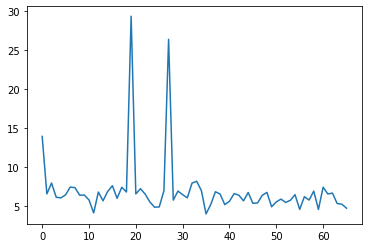

In [27]:
x = range(len(loss_batch_list))
y = loss_batch_list
plt.plot(x, y)
plt.show()